In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
train_dataset = pd.read_csv('../../train_final.csv', names=["vx", "vy", "vz", "dx", "dy", "vfx", "vfy", "vfz", "afx", "afy", "afz", "num_v_labels", "ax", "ay", "az"])
test_dataset = pd.read_csv('../../test.csv', names=["vx", "vy", "vz", "dx", "dy", "vfx", "vfy", "vfz", "afx", "afy", "afz", "num_v_labels", "ax", "ay", "az"])

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_dataset = train_dataset.drop(train_dataset.index[0])
test_dataset = test_dataset.drop(test_dataset.index[0])

In [4]:
print("Shape of the training data is", train_dataset.shape)
print("Shape of the validation data is", test_dataset.shape)

Shape of the training data is (154371, 15)
Shape of the validation data is (29004, 15)


In [5]:
X_train = train_dataset.iloc[:, :12]
X_test = test_dataset.iloc[:, :12]
print("Shape of the X_train is", X_train.shape)
print("Shape of the X_test is", X_test.shape)

Shape of the X_train is (154371, 12)
Shape of the X_test is (29004, 12)


In [6]:
Y_train = train_dataset.iloc[:,12:]
Y_test = test_dataset.iloc[:, 12:]
print("Shape of the Y_train is", Y_train.shape)
print("Shape of the Y_test is", Y_test.shape)

Shape of the Y_train is (154371, 3)
Shape of the Y_test is (29004, 3)


In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(12,)),
    
    Dense(3, activation='sigmoid'),
])

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.compile(optimizer='sgd', loss='mse',
              metrics=['mae', 'mse'])

In [10]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_val, Y_val))


Train on 138933 samples, validate on 15438 samples
Epoch 1/50
138933/138933 [==============================] - 11s 82us/step - loss: 0.2699 - mae: 0.3067 - mse: 0.2699 - val_loss: 0.2663 - val_mae: 0.3010 - val_mse: 0.2663
Epoch 2/50
138933/138933 [==============================] - 12s 83us/step - loss: 0.2627 - mae: 0.3003 - mse: 0.2627 - val_loss: 0.2658 - val_mae: 0.3006 - val_mse: 0.2658
Epoch 3/50
138933/138933 [==============================] - 11s 80us/step - loss: 0.2624 - mae: 0.3000 - mse: 0.2624 - val_loss: 0.2655 - val_mae: 0.3003 - val_mse: 0.2655
Epoch 4/50
138933/138933 [==============================] - 11s 79us/step - loss: 0.2622 - mae: 0.2998 - mse: 0.2622 - val_loss: 0.2654 - val_mae: 0.3003 - val_mse: 0.2654
Epoch 5/50
138933/138933 [==============================] - 12s 83us/step - loss: 0.2621 - mae: 0.2998 - mse: 0.2621 - val_loss: 0.2653 - val_mae: 0.3002 - val_mse: 0.2653
Epoch 6/50
138933/138933 [==============================] - 12s 84us/step - loss: 0.2621

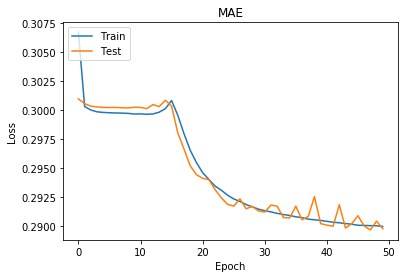

In [11]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('MAE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.3076060740913747
Mean Squared Error: 0.2792367882573317
Root Mean Squared Error: 0.5284286028001624
